In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('../data/data.csv')

In [3]:
df.head()

,映画名,つまらない,隊長つまらない,ジャンル,主演,出演人数（記憶&おおよそ）
0,ジョーズ,0,0,アニマルパニック,サメ,100
1,ディープ・ブルー,0,0,アニマルパニック,サメ,20
2,パニック・マーケット,0,0,アニマルパニック,サメ,50
3,トリプルヘッド・ジョーズ,1,0,アニマルパニック,サメ,50
4,シャークネード,0,0,アニマルパニック,サメ,100


In [4]:
a = pd.get_dummies(df['ジャンル'])
b = pd.get_dummies(df['主演'])
_df = pd.concat([df, a, b], axis=1)

In [5]:
_df.head()

,映画名,つまらない,隊長つまらない,ジャンル,主演,出演人数（記憶&おおよそ）,SF,アクション,アニマルパニック,ホラー,...,ドーナツ,ネコ,ヘビ,ワニ,人間,宇宙人,怪人,恐竜,悪魔,機械
0,ジョーズ,0,0,アニマルパニック,サメ,100,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,ディープ・ブルー,0,0,アニマルパニック,サメ,20,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,パニック・マーケット,0,0,アニマルパニック,サメ,50,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,トリプルヘッド・ジョーズ,1,0,アニマルパニック,サメ,50,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,シャークネード,0,0,アニマルパニック,サメ,100,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
ignore_columns = ['映画名','つまらない','隊長つまらない','ジャンル','主演']

In [7]:
x_names = _df.columns[~_df.columns.isin(ignore_columns)]

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [9]:
X_train, X_test, y_train, y_test = train_test_split(_df.loc[:, x_names], _df['つまらない'], test_size=0.4, random_state=71)

In [10]:
X_train.shape, y_train.shape

((18, 18), (18,))

In [11]:
clf = DecisionTreeClassifier(min_samples_leaf=2, max_depth=10, random_state=71)

In [12]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=71,
            splitter='best')

In [13]:
print(classification_report(y_train, clf.predict(X_train)))

             precision    recall  f1-score   support

          0       0.69      1.00      0.82         9
          1       1.00      0.56      0.71         9

avg / total       0.85      0.78      0.77        18



In [14]:
print(classification_report(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

          0       0.40      1.00      0.57         4
          1       1.00      0.25      0.40         8

avg / total       0.80      0.50      0.46        12



In [15]:
import graphviz

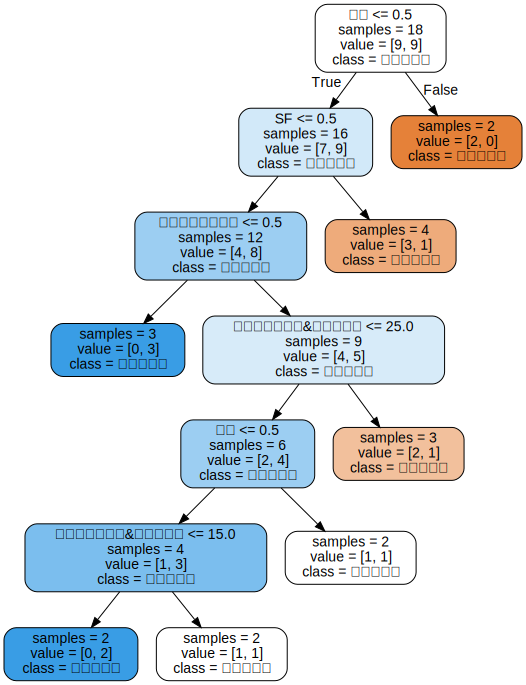

In [16]:
# tree.dotという名前で分析結果を出力
export_graphviz(clf, out_file='tree.dot',
    feature_names=x_names,
    class_names=['おもしろい','つまらない'],
    filled=True, rounded=True, impurity=False)
 
 
# tree.dotファイルを可視化
with open('tree.dot') as f:
    dot_graph = f.read()
 
graphviz.Source(dot_graph)

In [17]:
_test_df = pd.concat([X_test, y_test], axis=1)

In [18]:
_test_df.loc[:, 'predicted'] = clf.predict(X_test)

In [19]:
proba = clf.predict_proba(X_test)
a_df = pd.DataFrame(proba, columns=['proba_おもしろい','proba_つまらない']).reset_index(drop=True)

In [20]:
test_df = pd.concat([_test_df.reset_index(drop=True), a_df], axis=1)
test_df.index = _test_df.index

In [21]:
test_df

,出演人数（記憶&おおよそ）,SF,アクション,アニマルパニック,ホラー,もみの木,キノコ,サメ,ドーナツ,ネコ,...,人間,宇宙人,怪人,恐竜,悪魔,機械,つまらない,predicted,proba_おもしろい,proba_つまらない
12,50,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.666667,0.333333
20,10,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0.000000,1.000000
4,100,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0.666667,0.333333
26,10,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0.000000,1.000000
7,30,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0.666667,0.333333
3,50,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0.666667,0.333333
15,30,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0.750000,0.250000
2,50,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0.666667,0.333333
10,20,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.500000,0.500000
5,20,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0.500000,0.500000


In [22]:
test_df['怪人']

12    0
20    0
4     0
26    0
7     0
3     0
15    0
2     0
10    0
5     0
14    0
19    0
Name: 怪人, dtype: uint8

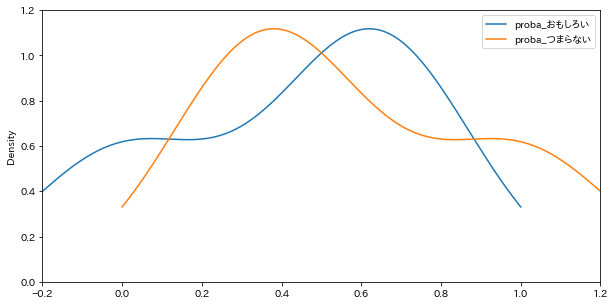

In [23]:
con = test_df['つまらない'] == test_df['predicted']

_, ax = plt.subplots(figsize=(10, 5))
test_df.loc[con, ['proba_おもしろい','proba_つまらない']].plot.kde(ax=ax)
ax.set_xlim(-0.2, 1.2)
ax.set_ylim(0, 1.2)
plt.show()

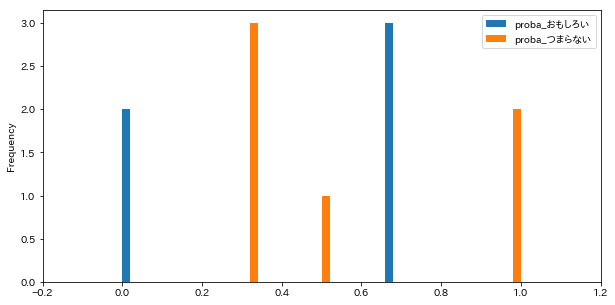

In [24]:
con = test_df['つまらない'] == test_df['predicted']

_, ax = plt.subplots(figsize=(10, 5))
test_df.loc[con, ['proba_おもしろい','proba_つまらない']].plot.hist(bins=50, ax=ax)
ax.set_xlim(-0.2, 1.2)
# ax.set_ylim(0, 1.2)
plt.show()

# 自分で書いたコードで試す

In [25]:
import sys
sys.path.append('../')

In [26]:
from tree import DecisionTree

In [27]:
s_tree = DecisionTree(max_depth=2)

In [28]:
_df.columns
_x_names = ['サメ']
_X_train = np.array(X_train[_x_names])
_X_test = np.array(X_test[_x_names])

In [29]:
s_tree.fit(_X_train, y_train)

0.5


In [30]:
print(classification_report(y_train, s_tree.predict(_X_train)))

             precision    recall  f1-score   support

          0       0.54      0.78      0.64         9
          1       0.60      0.33      0.43         9

avg / total       0.57      0.56      0.53        18



In [31]:
print(classification_report(y_test, s_tree.predict(_X_test)))

             precision    recall  f1-score   support

          0       0.29      0.50      0.36         4
          1       0.60      0.38      0.46         8

avg / total       0.50      0.42      0.43        12



In [32]:
a = s_tree.root.get_tree_info()
a

{'left': {'label': 0, 'data_count': 13, 'name': 'name_0.8053423034439823'},
 'right': {'label': 1, 'data_count': 5, 'name': 'name_0.9925901061998168'},
 'data_count': 18,
 'name': 'name_0.628638852903784'}

In [33]:
a['left']

{'label': 0, 'data_count': 13, 'name': 'name_0.8053423034439823'}

In [34]:
s_tree.root.threshold

0.5

In [35]:
s_tree.predict(_X_test)

[0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0]

In [36]:
s_tree.root.x

0

In [40]:
_x = _X_test
out = np.zeros([_x.shape[0], len(s_tree.root.labels)])
for i in range(_x.shape[0]):
    _node = s_tree.root
    while _node.left is not None:
        if _x[i, _node.x] < _node.threshold:
            _node = _node.left
        else:
            _node = _node.right
        
    if _node.x is None:
        out[i, :] = _node.count_by_label

In [41]:
out

array([[7., 6.],
       [7., 6.],
       [2., 3.],
       [7., 6.],
       [2., 3.],
       [2., 3.],
       [7., 6.],
       [2., 3.],
       [7., 6.],
       [2., 3.],
       [7., 6.],
       [7., 6.]])

In [43]:
normalizer =  out.sum(axis=1)[:, np.newaxis]

In [44]:
normalizer

array([[13.],
       [13.],
       [ 5.],
       [13.],
       [ 5.],
       [ 5.],
       [13.],
       [ 5.],
       [13.],
       [ 5.],
       [13.],
       [13.]])

In [45]:
normalizer[normalizer == 0.0] = 1.0

In [46]:
out /= normalizer

In [47]:
out

array([[0.53846154, 0.46153846],
       [0.53846154, 0.46153846],
       [0.4       , 0.6       ],
       [0.53846154, 0.46153846],
       [0.4       , 0.6       ],
       [0.4       , 0.6       ],
       [0.53846154, 0.46153846],
       [0.4       , 0.6       ],
       [0.53846154, 0.46153846],
       [0.4       , 0.6       ],
       [0.53846154, 0.46153846],
       [0.53846154, 0.46153846]])

In [63]:
clf = DecisionTreeClassifier(min_samples_leaf=1, max_depth=10, random_state=71)

0
